In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as datetime

from matplotlib import style
style.use("ggplot")

In [94]:
data = pd.read_csv('All_wells_final3.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.fillna(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7882 entries, 0 to 7881
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   7882 non-null   object 
 1   WELL_BORE_CODE            7882 non-null   object 
 2   AVG_DOWNHOLE_PRESSURE     7882 non-null   float64
 3   AVG_DOWNHOLE_TEMPERATURE  7882 non-null   float64
 4   AVG_DP_TUBING             7882 non-null   float64
 5   AVG_ANNULUS_PRESS         7882 non-null   float64
 6   AVG_CHOKE_SIZE_P          7882 non-null   float64
 7   AVG_WHP_P                 7882 non-null   float64
 8   AVG_WHT_P                 7882 non-null   float64
 9   DP_CHOKE_SIZE             7882 non-null   float64
 10  BORE_OIL_VOL              7882 non-null   float64
 11  BORE_GAS_VOL              7882 non-null   float64
 12  BORE_WAT_VOL              7882 non-null   float64
 13  WELL_POS                  7882 non-null   object 
dtypes: float

In [95]:
#df1 = pd.get_dummies(data[["WELL_BORE_CODE","AVG_DP_TUBING","AVG_ANNULUS_PRESS","AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P", "DP_CHOKE_SIZE","BORE_OIL_VOL","BORE_GAS_VOL", "BORE_WAT_VOL" ]])
df1 = data[["AVG_DP_TUBING","AVG_ANNULUS_PRESS","AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P", "DP_CHOKE_SIZE","BORE_OIL_VOL","BORE_GAS_VOL", "BORE_WAT_VOL" ]]
feature_names = df1.columns
df1.head()



,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,182.06,0.0,43.34,107.36,37.94,78.94,631.47,90439.09,0.0
1,171.05,0.0,47.17,99.19,60.76,70.63,1166.46,165720.39,0.0
2,168.24,0.0,47.73,94.60,63.05,66.05,1549.81,221707.31,0.0
3,165.54,0.0,48.53,89.99,64.55,61.41,1248.70,178063.52,0.0
4,162.42,0.0,49.84,84.78,65.72,56.15,1345.78,192602.19,0.0


In [96]:
X = df1
y = data['AVG_DOWNHOLE_PRESSURE'].values.reshape(-1,1)

In [97]:
print(X.shape)
print(y.shape)

(7882, 9)
(7882, 1)


In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [99]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(X_train)
X_train_s = x_scaler.transform(X_train)
X_test_s = x_scaler.transform(X_test)

In [100]:
from sklearn.preprocessing import StandardScaler

y_scaler = StandardScaler().fit( y_train)
y_train_s = y_scaler.transform( y_train)
y_test_s = y_scaler.transform(y_test)

LASSO REGRESSION WITH ALL VARIABLES EXCEPT AVG_DOWNHOLE_TEMPERATURE

In [101]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.3, normalize=True)
model.fit(X_train_s,y_train_s)
score = model.score(X_test_s, y_test_s)
print(f"R2 Score: {score}")


R2 Score: -0.00016570847760943863


In [102]:
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = model.predict(X_test_s)
# YOUR CODE HERE
# Score the prediction with mse and r2
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 1.0321639773385292
R-squared (R2 ): -0.00016570847760943863


In [103]:
# Call the `score` method on the model to show the r2 score
model.score(X_test_s, y_test_s)

-0.00016570847760943863

In [104]:
importances = model.coef_
importances

array([ 0., -0., -0.,  0., -0.,  0.,  0.,  0., -0.])

In [105]:
importances,feature_names

(array([ 0., -0., -0.,  0., -0.,  0.,  0.,  0., -0.]),
 Index(['AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P',
        'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
        'BORE_WAT_VOL'],
       dtype='object'))

In [115]:
model.predict(X_train).reshape(-1,1)

array([[-8.17406632e-17],
       [-8.17406632e-17],
       [-8.17406632e-17],
       ...,
       [-8.17406632e-17],
       [-8.17406632e-17],
       [-8.17406632e-17]])

Text(0.5, 1.0, 'Residual Plot')

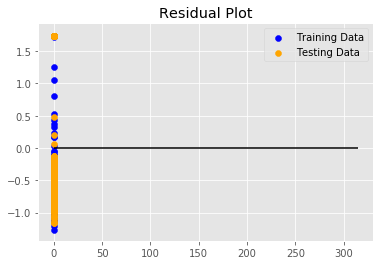

In [117]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train_s).reshape(-1,1), model.predict(X_train_s).reshape(-1,1) - y_train_s, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_s).reshape(-1,1), model.predict(X_test_s).reshape(-1,1) - y_test_s, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

RANDOM FOREST REGRESSION WITH ALL VARIABLES EXCEPT AVG_DOWNHOLE_TEMPERATURE

In [108]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=5)
rf = rf.fit(X_train_s, y_train_s)
rf.score(X_test_s, y_test_s)

C:\Users\RAKHI\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9963372049016737

In [109]:
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = rf.predict(X_test_s)
# YOUR CODE HERE
# Score the prediction with mse and r2
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.00377997878233519
R-squared (R2 ): 0.9963372049016737


In [110]:
# Call the `score` method on the model to show the r2 score
rf.score(X_test_s, y_test_s)

0.9963372049016737

In [111]:
importances= rf.feature_importances_
sorted(zip(importances,feature_names),reverse=True)

[(0.9825584571395048, 'AVG_DP_TUBING'),
 (0.013297891934737625, 'AVG_WHP_P'),
 (0.0016502059375572962, 'AVG_WHT_P'),
 (0.0007787601998515956, 'DP_CHOKE_SIZE'),
 (0.0006722370177369845, 'BORE_GAS_VOL'),
 (0.00048803277625455516, 'BORE_WAT_VOL'),
 (0.00043676903416053024, 'BORE_OIL_VOL'),
 (6.43754267836315e-05, 'AVG_CHOKE_SIZE_P'),
 (5.3270533413020896e-05, 'AVG_ANNULUS_PRESS')]

ValueError: x and y must be the same size

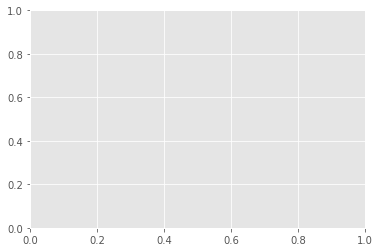

In [112]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(rf.predict(X_train), rf.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(rf.predict(X_test), rf.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

GRID SEARCH CV

In [87]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [88]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [89]:
grid.fit(X_train_s, y_train_s)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..................... C=1, gamma=0.0001, score=nan, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..................... C=1, gamma=0.0001, score=nan, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..................... C=1, gamma=0.0001, score=nan, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..................... C=1, gamma=0.0001, score=nan, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..................... C=1, gamma=0.0001, score=nan, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ..................... C=1, gamma=0.0005, score=nan, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\RAKHI\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RAKHI\Anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\RAKHI\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

ValueError: Unknown label type: 'continuous'

In [ ]:
# List the best parameters for this dataset
print(grid.best_params_)

In [ ]:
# List the best score
print(grid.best_score_)

In [ ]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)